In [170]:
%pylab inline

import cv2
import gym
import gym_super_mario_bros
import numpy as np
import torch
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
from nes_py.wrappers import JoypadSpace
from torch.multiprocessing import Pipe, Process


import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [49]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

env.observation_space.shape

(240, 256, 3)

In [48]:
state, reward, done, info = env.step(1)
cv2.resize(state, (128, 120))


NameError: name 'env' is not defined

array([[0],
       [2]])

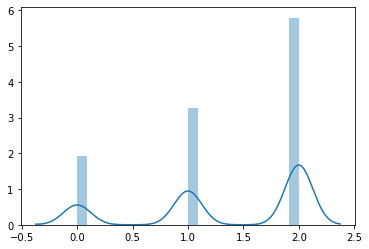

In [167]:
dd = torch.Tensor([[0.3, 0.5, 0.9], [0.3, 0.5, 0.9]])

values = [dd.multinomial(1).cpu().numpy()[0] for i in range(10000)]
sns.distplot(values)

dd.multinomial(1).cpu().numpy()

In [194]:
def f(pipe):
    text = pipe.recv()
    print(text)
    pipe.send('haha')


parent_conn, child_conn = Pipe()
process = Process(target=f, args=(child_conn,))
process.start()

Process Process-7:
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/local/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-194-72a2376bff59>", line 2, in f
    text = pipe.recv()
  File "/usr/local/lib/python3.6/multiprocessing/connection.py", line 250, in recv
    buf = self._recv_bytes()
  File "/usr/local/lib/python3.6/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/usr/local/lib/python3.6/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt


In [196]:
parent_conn.send('asdf')
parent_conn.recv()

'asdf'